# Explore here

In [2]:
import pandas as pd

df = pd.read_csv('https://raw.githubusercontent.com/4GeeksAcademy/decision-tree-project-tutorial/main/diabetes.csv')
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [3]:
from sklearn.model_selection import train_test_split

X = df.drop(['Outcome'], axis=1)
y = df['Outcome']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)


<Axes: >

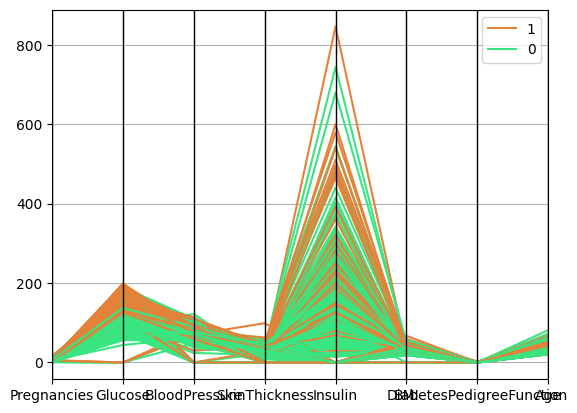

In [5]:
pd.plotting.parallel_coordinates(df, "Outcome", color = ("#E58139", "#39E581"))

<Axes: >

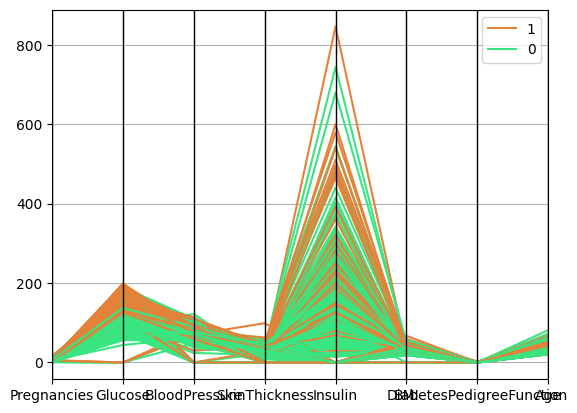

In [6]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaler.fit_transform(X_train)
X_train_esc = scaler.transform(X_train)

X_train_esc = pd.DataFrame(X_train_esc,columns=X_train.columns,index=X_train.index)



pd.plotting.parallel_coordinates(df, "Outcome", color = ("#E58139", "#39E581"))


In [7]:
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier(random_state = 42)
model.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

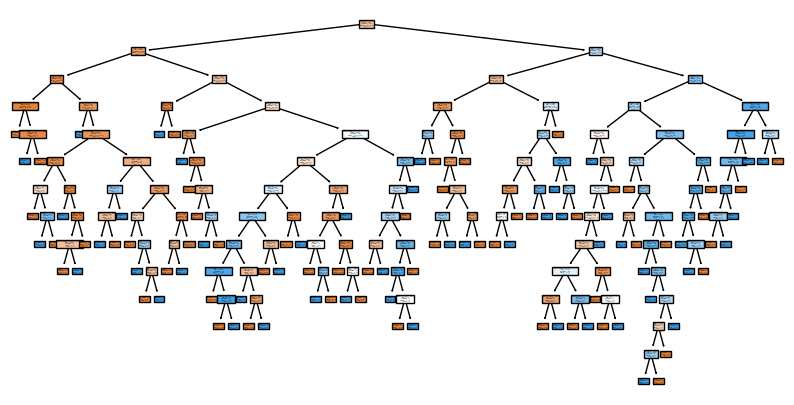

In [8]:
import matplotlib.pyplot as plt
from sklearn import tree

fig = plt.figure(figsize=(10,5))

tree.plot_tree(model, feature_names = list(X_train.columns), class_names = ["0", "1"], filled = True)

plt.show()

In [9]:
y_pred = model.predict(X_test)
y_pred

array([1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1,
       0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0,
       0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1,
       1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1,
       0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0])

In [14]:
from sklearn.metrics import accuracy_score

print(f'AS: {accuracy_score(y_pred, y_test)}')

AS: 0.7467532467532467


In [19]:
from sklearn.model_selection import GridSearchCV

grid = {
    'max_depth':[5,6,7,8,9,10,11,12],
    'min_samples_split':[3,4,5,6],
    'criterion':['gini','entropy','log_loss']
}

grid_search = GridSearchCV(model,grid,n_jobs=2,scoring='accuracy')



In [20]:
result = grid_search.fit(X_train,y_train)

In [21]:
result.best_params_

{'criterion': 'gini', 'max_depth': 5, 'min_samples_split': 3}

In [22]:
best_model = result.best_estimator_

In [23]:
y_pred2 = best_model.predict(X_test)

In [24]:
print(f'Precisión: {accuracy_score(y_pred2,y_test)}')

Precisión: 0.7922077922077922


In [25]:
from pickle import dump

dump(best_model, open('decision_tree_classifier_gini_md_5_mss_3_42.sav', 'wb'))